# Short data discovery

In [1]:
import os

print(os.getcwd())

dir_names = ", ".join(os.listdir("./datasets/gan-getting-started"))
print("The data are made of the following directories:", dir_names)

d:\repositories\something-of-a-painter-myself\data
The data are made of the following directories: monet_jpg, monet_tfrec, photo_jpg, photo_tfrec


First, we take a look at how many images we deal with.
The `*_jpg` directories contain the images while the others probably contain
the metadata.

In [2]:
monet_dir_files = os.listdir("./datasets/gan-getting-started/monet_jpg")
print("Number if Monet paintings:", len(monet_dir_files))
print("Sample of the image names:", ", ".join(monet_dir_files[:5]))

print()

photo_dir_files = os.listdir("./datasets/gan-getting-started/photo_jpg")
print("Number of photos:", len(photo_dir_files))
print("Sample of the image names:", ", ".join(photo_dir_files[:5]))

Number if Monet paintings: 300
Sample of the image names: 000c1e3bff.jpg, 011835cfbf.jpg, 0260d15306.jpg, 049e293b93.jpg, 05144e306f.jpg

Number of photos: 7038
Sample of the image names: 00068bc07f.jpg, 000910d219.jpg, 000ded5c41.jpg, 00104fd531.jpg, 001158d595.jpg


- Classes are unbalanced.

## What dimensions do the images have?
First the photos:

In [3]:
import cv2

photos = []
for photo_file_name in photo_dir_files:
    photo = cv2.imread(f"./datasets/gan-getting-started/photo_jpg/{photo_file_name}")
    photos.append(photo)

first_shape = photos[0].shape
shapes_same = all(photo.shape == first_shape for photo in photos)
print(f"All photos have the same dimensions {first_shape}:", shapes_same)

All photos have the same dimensions (256, 256, 3): True


Now the Monet paintings:

In [4]:
monets = []
for monet_file_name in monet_dir_files:
    monet = cv2.imread(f"./datasets/gan-getting-started/monet_jpg/{monet_file_name}")
    monets.append(monet)

first_shape = monets[0].shape
shapes_same = all(monet.shape == first_shape for monet in monets)
print(f"All Monets have the same dimensions {first_shape}:", shapes_same)

All Monets have the same dimensions (256, 256, 3): True


Are the names of all images unique?

In [5]:
are_found = []
for monet_name in monet_dir_files:
    are_found.append(monet_name in set(photo_dir_files))

print("Monets and photos share file names:", any(are_found))

Monets and photos share file names: False


## Some examples of both cases

Structure of the images: [[[ 0  1  0]
  [ 1  3  0]
  [18 20 15]
  ...
  [ 0  5  0]
  [10 15  9]
  [ 8 13  7]]

 [[ 2  4  0]
  [ 7  9  4]
  [15 17 12]
  ...
  [ 3  8  2]
  [ 0  2  0]
  [24 29 23]]

 [[25 27 22]
  [ 0  1  0]
  [ 0  1  0]
  ...
  [43 48 42]
  [ 6 11  5]
  [ 1  6  0]]

 ...

 [[ 7  7  5]
  [19 19 17]
  [19 19 17]
  ...
  [37 39 38]
  [15 16 18]
  [ 0  0  2]]

 [[14 14 12]
  [10 10  8]
  [ 1  1  0]
  ...
  [ 0  0  2]
  [ 0  0  2]
  [16 17 19]]

 [[ 2  2  0]
  [ 1  1  0]
  [ 1  1  0]
  ...
  [ 1  2  4]
  [ 1  2  4]
  [ 5  6  8]]]


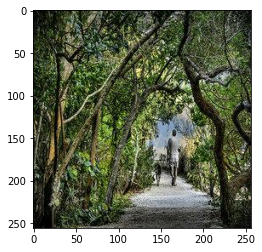

In [6]:
import matplotlib.pyplot as plt
import random

random.seed(69)

def show_rand_img_from(imgs_path):
    photo_name = random.choice(os.listdir(imgs_path))
    photo = cv2.imread(imgs_path + photo_name)
    photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
    plt.imshow(photo)

    return photo

photo = show_rand_img_from("./datasets/gan-getting-started/photo_jpg/")

print("Structure of the images:", photo)

array([[[ 90, 110, 119],
        [ 91, 111, 120],
        [ 97, 114, 122],
        ...,
        [114, 151, 180],
        [111, 148, 177],
        [119, 156, 185]],

       [[ 98, 116, 128],
        [ 98, 116, 126],
        [102, 116, 127],
        ...,
        [ 64, 101, 130],
        [ 63, 100, 129],
        [ 63, 100, 129]],

       [[ 99, 112, 128],
        [ 98, 112, 125],
        [100, 109, 124],
        ...,
        [ 58,  93, 121],
        [ 55,  90, 118],
        [ 44,  79, 107]],

       ...,

       [[ 58,  65,  71],
        [ 68,  76,  79],
        [ 85,  90,  94],
        ...,
        [  3,  11,  14],
        [  0,   4,   7],
        [  0,   2,   5]],

       [[ 64,  71,  79],
        [ 60,  67,  73],
        [ 68,  75,  81],
        ...,
        [  4,  12,  15],
        [  3,  11,  14],
        [  3,  11,  14]],

       [[ 63,  70,  78],
        [ 60,  67,  75],
        [ 72,  79,  85],
        ...,
        [ 23,  31,  34],
        [  0,   2,   5],
        [  2,  10,  13]]

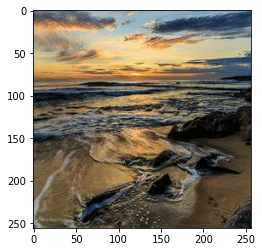

In [7]:
show_rand_img_from("./datasets/gan-getting-started/photo_jpg/")

array([[[  8,  66, 104],
        [  8,  66, 104],
        [  9,  67, 105],
        ...,
        [  0,  34,  72],
        [  1,  33,  72],
        [  1,  33,  72]],

       [[  8,  66, 104],
        [  8,  66, 104],
        [  9,  67, 105],
        ...,
        [  1,  35,  73],
        [  1,  33,  72],
        [  1,  33,  72]],

       [[  6,  66, 103],
        [  7,  67, 104],
        [  9,  67, 105],
        ...,
        [  1,  34,  75],
        [  1,  34,  75],
        [  0,  33,  74]],

       ...,

       [[  6,   5,   3],
        [  9,   8,   6],
        [ 21,  20,  18],
        ...,
        [ 27,  27,  25],
        [ 23,  23,  21],
        [ 15,  15,  13]],

       [[  4,   2,   3],
        [ 12,  10,  11],
        [ 26,  24,  25],
        ...,
        [ 20,  20,  18],
        [ 21,  21,  19],
        [ 22,  22,  20]],

       [[ 13,  11,  12],
        [ 15,  13,  14],
        [ 27,  25,  26],
        ...,
        [ 13,  13,  11],
        [ 19,  19,  17],
        [ 28,  28,  26]]

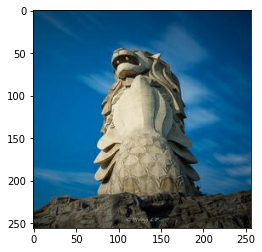

In [8]:
show_rand_img_from("./datasets/gan-getting-started/photo_jpg/")

Now some Monets:

array([[[ 90, 131, 177],
        [ 92, 133, 179],
        [ 94, 134, 183],
        ...,
        [111, 158, 202],
        [115, 160, 202],
        [115, 160, 202]],

       [[ 90, 130, 179],
        [ 90, 130, 179],
        [ 90, 130, 179],
        ...,
        [108, 152, 197],
        [110, 155, 197],
        [110, 155, 197]],

       [[ 90, 130, 181],
        [ 87, 127, 178],
        [ 84, 124, 175],
        ...,
        [106, 149, 194],
        [109, 152, 195],
        [111, 154, 197]],

       ...,

       [[ 63,  42,  57],
        [ 47,  29,  45],
        [ 24,   5,  25],
        ...,
        [107, 105,  64],
        [ 98,  98,  60],
        [ 83,  83,  45]],

       [[ 75,  54,  63],
        [ 56,  36,  47],
        [ 36,  15,  34],
        ...,
        [112, 111,  65],
        [116, 117,  75],
        [111, 113,  73]],

       [[ 57,  36,  41],
        [ 50,  29,  38],
        [ 44,  23,  42],
        ...,
        [ 97,  99,  52],
        [101, 102,  58],
        [117, 120,  77]]

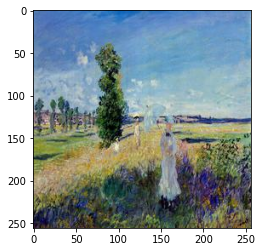

In [9]:
show_rand_img_from("./datasets/gan-getting-started/monet_jpg/")

array([[[ 97, 133, 157],
        [ 96, 132, 156],
        [ 96, 131, 159],
        ...,
        [130, 156, 145],
        [131, 157, 144],
        [136, 162, 149]],

       [[103, 139, 163],
        [101, 137, 161],
        [100, 136, 162],
        ...,
        [133, 159, 148],
        [134, 160, 147],
        [138, 164, 151]],

       [[109, 143, 168],
        [107, 141, 166],
        [105, 139, 166],
        ...,
        [134, 157, 147],
        [132, 155, 145],
        [133, 156, 146]],

       ...,

       [[ 70,  88,  50],
        [ 81,  99,  61],
        [ 85, 105,  70],
        ...,
        [ 75,  86, 131],
        [ 89, 100, 146],
        [120, 131, 177]],

       [[108, 125,  93],
        [110, 126,  97],
        [106, 125,  95],
        ...,
        [ 80,  93, 127],
        [ 94, 107, 142],
        [106, 119, 154]],

       [[126, 142, 115],
        [122, 141, 113],
        [119, 137, 111],
        ...,
        [ 79,  93, 122],
        [ 88, 101, 133],
        [ 84,  97, 129]]

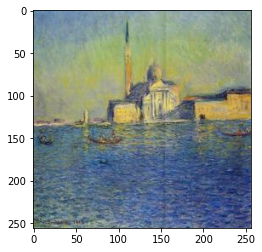

In [10]:
show_rand_img_from("./datasets/gan-getting-started/monet_jpg/")

array([[[ 71, 150, 193],
        [ 76, 155, 198],
        [ 80, 161, 206],
        ...,
        [ 92, 178, 213],
        [ 91, 175, 211],
        [ 92, 176, 212]],

       [[ 69, 148, 191],
        [ 73, 152, 195],
        [ 77, 158, 203],
        ...,
        [ 92, 178, 213],
        [ 93, 177, 213],
        [ 93, 177, 213]],

       [[ 74, 153, 196],
        [ 77, 156, 199],
        [ 79, 160, 205],
        ...,
        [ 93, 179, 214],
        [ 94, 178, 212],
        [ 96, 180, 214]],

       ...,

       [[ 97, 114,  62],
        [ 86, 103,  49],
        [111, 129,  77],
        ...,
        [103, 113,  52],
        [116, 125,  70],
        [104, 114,  61]],

       [[101, 117,  68],
        [ 88, 105,  53],
        [100, 116,  67],
        ...,
        [117, 127,  67],
        [123, 132,  77],
        [105, 115,  62]],

       [[100, 116,  67],
        [101, 117,  68],
        [102, 118,  69],
        ...,
        [120, 130,  70],
        [120, 129,  74],
        [ 98, 108,  55]]

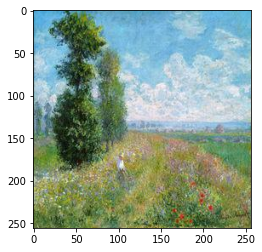

In [11]:
show_rand_img_from("./datasets/gan-getting-started/monet_jpg/")

## Something useful to see in the average images?

[[[145 153 148]
  [146 154 149]
  [148 155 150]
  ...
  [143 151 148]
  [142 151 148]
  [142 150 148]]

 [[146 154 149]
  [146 154 149]
  [147 154 150]
  ...
  [144 152 149]
  [144 152 149]
  [143 152 149]]

 [[146 153 148]
  [147 154 149]
  [148 155 150]
  ...
  [145 153 149]
  [144 152 149]
  [143 152 148]]

 ...

 [[100 118 118]
  [ 98 117 117]
  [ 97 115 115]
  ...
  [ 95 112 115]
  [ 95 112 115]
  [ 97 114 117]]

 [[101 120 120]
  [ 99 119 119]
  [ 98 117 117]
  ...
  [ 96 114 116]
  [ 96 113 116]
  [ 98 115 118]]

 [[103 123 123]
  [101 121 121]
  [101 120 120]
  ...
  [ 99 117 120]
  [100 117 121]
  [101 118 121]]]


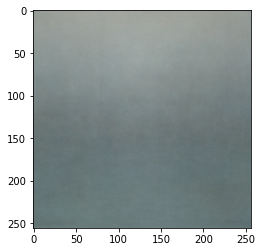

In [12]:
import numpy as np

monet_dir = "./datasets/gan-getting-started/monet_jpg/"
single_img_weight = 1 / len(monet_dir_files)
monet_avg = cv2.imread(monet_dir + monet_dir_files[0]) * single_img_weight

for monet_name in monet_dir_files[1:]:
    monet = cv2.imread(monet_dir + monet_name) * single_img_weight
    monet_avg += monet

monet_avg = np.round(monet_avg).astype(int)
print(monet_avg)
plt.imshow(monet_avg)

[[[115 104  89]
  [116 104  90]
  [116 104  90]
  ...
  [118 107  93]
  [118 106  92]
  [117 106  92]]

 [[116 104  90]
  [116 105  90]
  [117 105  91]
  ...
  [118 107  93]
  [118 106  93]
  [117 106  92]]

 [[116 104  90]
  [117 105  91]
  [117 105  91]
  ...
  [119 107  93]
  [118 107  93]
  [117 106  92]]

 ...

 [[ 54  66  67]
  [ 54  67  67]
  [ 55  67  68]
  ...
  [ 54  67  67]
  [ 55  67  67]
  [ 54  66  66]]

 [[ 53  65  66]
  [ 54  66  67]
  [ 54  67  67]
  ...
  [ 54  67  67]
  [ 54  66  67]
  [ 54  66  67]]

 [[ 53  65  66]
  [ 53  65  66]
  [ 53  65  66]
  ...
  [ 54  66  67]
  [ 54  65  66]
  [ 53  65  66]]]


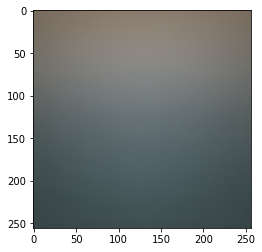

In [13]:
photo_dir = "./datasets/gan-getting-started/photo_jpg/"
single_img_weight = 1 / len(photo_dir_files)
photo_avg = cv2.imread(photo_dir + photo_dir_files[0]) * single_img_weight

for photo_name in photo_dir_files[1:]:
    photo = cv2.imread(photo_dir + photo_name) * single_img_weight
    photo_avg += photo

photo_avg = np.round(photo_avg).astype(int)
print(photo_avg)
plt.imshow(photo_avg)

The `*.tfrecords` contain the images in a more easily readable format.